<a target="_blank" href="https://colab.research.google.com/github/yajuna/crafting_math/blob/master/GenerateSongsFromLearningLyrics.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

This notebook is modified from the Google colab notebook for NLP. You can find a playlist of videos on NLP here: 
https://www.youtube.com/playlist?list=PLQY2H8rRoyvzDbLUZkbudP-MFQZwNmU4S

The original notebook is linked under the Part 6 video (Training an AI to create poetry).


In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

Download and install required packages for data

In [2]:
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import library and download data from Kaggle. Here we use the 21 pilots songs for lyrics prediction NLP at 

https://www.kaggle.com/datasets/cosmosankur/21-pilots-songs-for-lyrics-prediction-nlp

For datasets on Kaggle, you will need a token from Kaggle, via My Profile--> Account--> API-->Create New Token

In [3]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/cosmosankur/21-pilots-songs-for-lyrics-prediction-nlp")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: eatsmelon
Your Kaggle Key: ··········


100%|██████████| 8.82k/8.82k [00:00<00:00, 23.7MB/s]

Obtain data for predictions

In [4]:
# !wget --no-check-certificate \
#     https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt \
#     -O /tmp/irish-lyrics-eof.txt

In [5]:
tokenizer = Tokenizer()

# read irish lyrics for song prediction
# data = open('/tmp/irish-lyrics-eof.txt').read()

data = open('/content/21-pilots-songs-for-lyrics-prediction-nlp/21pilots.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'i': 1, 'to': 2, 'my': 3, 'the': 4, 'you': 5, 'a': 6, "i'm": 7, 'and': 8, 'know': 9, 'it': 10, 'me': 11, 'but': 12, 'oh': 13, 'on': 14, 'that': 15, 'of': 16, 'is': 17, 'in': 18, "don't": 19, 'we': 20, 'for': 21, 'be': 22, 'they': 23, 'when': 24, 'will': 25, 'take': 26, 'all': 27, "it's": 28, 'ah': 29, 'no': 30, 'this': 31, 'time': 32, 'now': 33, "i've": 34, "i'll": 35, 'na': 36, 'with': 37, 'our': 38, 'just': 39, 'out': 40, 'have': 41, 'what': 42, 'been': 43, 'let': 44, 'think': 45, 'if': 46, 'used': 47, 'so': 48, 'sleep': 49, 'much': 50, "you're": 51, 'would': 52, 'one': 53, 'are': 54, 'your': 55, 'back': 56, 'yeah': 57, 'could': 58, 'need': 59, 'trying': 60, 'jumpsuit': 61, 'where': 62, 'wish': 63, 'good': 64, 'about': 65, 'too': 66, 'thinking': 67, 'beat': 68, 'can': 69, 'make': 70, 'at': 71, 'up': 72, 'ever': 73, 'pretend': 74, 'way': 75, 'want': 76, 'alive': 77, 'play': 78, 'not': 79, 'forget': 80, 'than': 81, 'sang': 82, 'old': 83, 'us': 84, 'say': 85, "can't": 86, "we're": 87, 

In [6]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [7]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['stressed'])

18
4
615
16
53
93


In [8]:
print(xs[6])

[  0   0   0   0   0   0   0   1  63   1 175 145 146 449]


In [9]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [10]:
print(xs[5])
print(ys[5])

[  0   0   0   0   0   0   0   0   1  63   1 175 145 146]
[0. 0. 0. ... 0. 0. 0.]


In [11]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


Epoch 1/100
204/204 [==============================] - 24s 53ms/step - loss: 5.2055 - accuracy: 0.1365
Epoch 2/100
204/204 [==============================] - 2s 10ms/step - loss: 2.9316 - accuracy: 0.4681
Epoch 3/100
204/204 [==============================] - 2s 7ms/step - loss: 1.7460 - accuracy: 0.6206
Epoch 4/100
204/204 [==============================] - 2s 9ms/step - loss: 1.1282 - accuracy: 0.7302
Epoch 5/100
204/204 [==============================] - 2s 7ms/step - loss: 0.7932 - accuracy: 0.8056
Epoch 6/100
204/204 [==============================] - 2s 8ms/step - loss: 0.6070 - accuracy: 0.8493
Epoch 7/100
204/204 [==============================] - 2s 10ms/step - loss: 0.5138 - accuracy: 0.8701
Epoch 8/100
204/204 [==============================] - 2s 8ms/step - loss: 0.4754 - accuracy: 0.8713
Epoch 9/100
204/204 [==============================] - 2s 8ms/step - loss: 0.4457 - accuracy: 0.8736
Epoch 10/100
204/204 [==============================] - 1s 7ms/step - loss: 0.4403 - ac

In [12]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

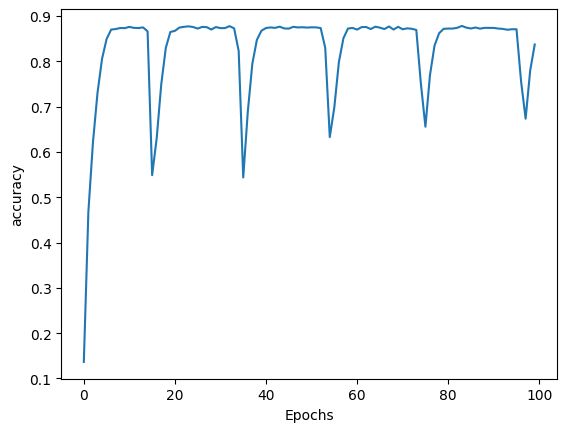

In [13]:
plot_graphs(history, 'accuracy')


In [14]:
seed_text = "Can't stop thinking about if and when I'd die"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 19ms/step
Can't stop thinking about if and when I'd die for i never look for conflict for would time there's you by their very away there's no since one ever comes be range from disease decay me my cavalry so islands from just hates the clock their and then break both my hands behind describe terrible knew lift ready to when you know we've made it this far kid every rhyme every time i sang some sell out for you i think is heading south sitting here sitting next to you never put every songs to on the map sitting next to you should have to this yeah remind hide
